In [1]:
import sys
import os
import importlib

sys.path.append('../shared')

if 'nlp_methods' in sys.modules:
    importlib.reload(sys.modules['nlp_methods'])

from nlp_methods import NLPMethods

nlp_methods = NLPMethods("https://www.gutenberg.org/cache/epub/2500/pg2500.txt")

clean_corpus = nlp_methods.remove_gutenberg_header()
corpus_data = nlp_methods.get_processed_text(clean_corpus)

chapters = nlp_methods.get_chapters(clean_corpus)
chapters_data = nlp_methods.get_chapter_data(chapters, clean_corpus)
chapters_df = nlp_methods.chapters_to_dataframe(chapters_data)

random_sample = nlp_methods.get_random_sample_chapter_data(chapters, clean_corpus)
systematic_sample = nlp_methods.get_systematic_sample_chapter_data(chapters, clean_corpus)
print(nlp_methods.compare_sample_lengths(random_sample, systematic_sample))

Number of quotes found: 372
Longest dialogue instance (2204 characters):
"Listen well, my dear, listen well! The sinner, which I am and which
you are, is a sinner, but in times to come he will be Brahma again, he
will reach the Nirvana, will be Buddha—and now see: these ‘times to
come’ are a deception, are only a parable! The sinner is not on his way
to become a Buddha, he is not in the process of developing, though our
capacity for thinking does not know how else to picture these things.
No, within the sinner is now and today already the future Buddha, his
future is already all there, you have to worship in him, in you, in
everyone the Buddha which is coming into being, the possible, the
hidden Buddha. The world, my friend Govinda, is not imperfect, or on a
slow path towards perfection: no, it is perfect in every moment, all
sin already carries the divine forgiveness in itself, all small
children already have the old person in themselves, all infants already
have death, all dying peop

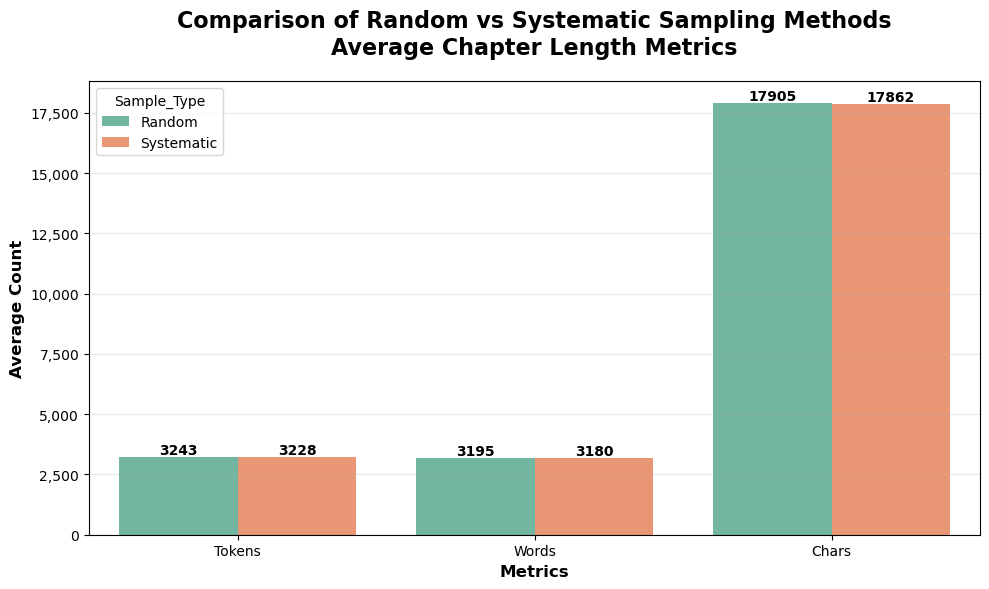


SUMMARY STATISTICS
Random Sample Count: 7 chapters
Systematic Sample Count: 8 chapters

Differences (Random - Systematic):
Tokens: 15.5
Words: 15.4
Characters: 42.9


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get the comparison data
comparison_data = nlp_methods.compare_sample_lengths(random_sample, systematic_sample)

# Prepare data for plotting
plot_data = []

# Extract data for each metric
metrics = ['tokens', 'words', 'chars']
for metric in metrics:
    avg_key = f'avg_{metric}'
    plot_data.append({
        'Metric': metric.title(),
        'Sample_Type': 'Random',
        'Average': comparison_data['random_sample'][avg_key]
    })
    plot_data.append({
        'Metric': metric.title(),
        'Sample_Type': 'Systematic', 
        'Average': comparison_data['systematic_sample'][avg_key]
    })

df_plot = pd.DataFrame(plot_data)

plt.style.use('default')
sns.set_palette("Set2")

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=df_plot, x='Metric', y='Average', hue='Sample_Type', ax=ax)

# Customize the plot
ax.set_title('Comparison of Random vs Systematic Sampling Methods\nAverage Chapter Length Metrics', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Count', fontsize=12, fontweight='bold')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=10, fontweight='bold')

ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print(f"Random Sample Count: {comparison_data['random_sample']['count']} chapters")
print(f"Systematic Sample Count: {comparison_data['systematic_sample']['count']} chapters")
print("\nDifferences (Random - Systematic):")
print(f"Tokens: {comparison_data['differences']['token_diff']:,.1f}")
print(f"Words: {comparison_data['differences']['word_diff']:,.1f}")
print(f"Characters: {comparison_data['differences']['char_diff']:,.1f}")



/var/folders/02/c1hvrmj11kx0z457p84l6pbc0000gn/T/ipykernel_47049/3749549574.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_data, y='Content_Type', x='Percentage', orient='h',


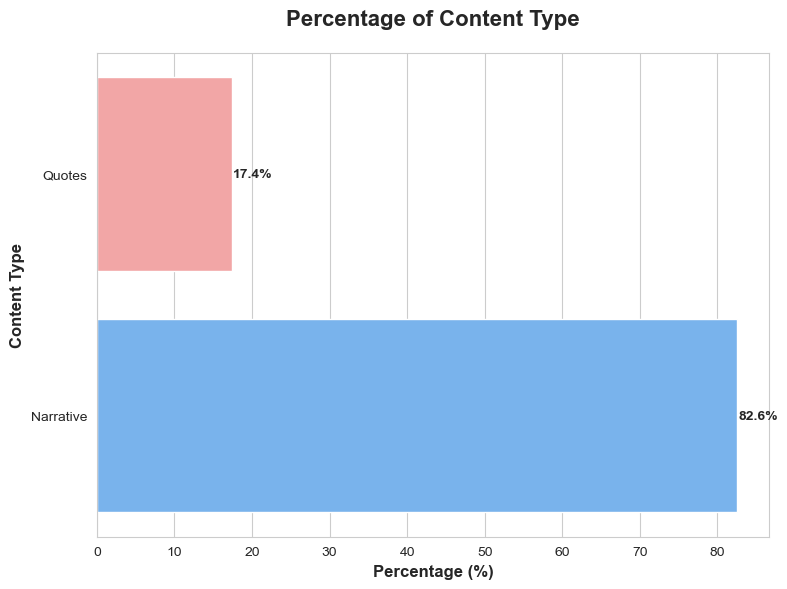


📊 QUOTES VS NARRATIVE ANALYSIS
Total sentences: 2,134
Dialogue Instances: 372 (17.4%)
Narrative sentences: 1,762 (82.6%)

Total tokens: 39,799
Quote tokens: 0
Narrative tokens: 39,799

Ratio of narrative to quotes: 4.7:1


In [3]:
# Plot quotes vs narrative comparison using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract quote vs narrative data from corpus_data
quotes = len(corpus_data['quotes'])
non_quote_sentences = len(corpus_data['non_quote_sentences'])
quote_tokens = len(corpus_data['quote_tokens'])
non_quote_tokens = len(corpus_data['non_quote_tokens'])

# Calculate percentages
quote_percentage = (quotes / (quotes + non_quote_sentences)) * 100
narrative_percentage = (non_quote_sentences / (quotes + non_quote_sentences)) * 100

# Prepare data for seaborn
plot_data = pd.DataFrame({
    'Content_Type': ['Quotes', 'Narrative'],
    'Percentage': [quote_percentage, narrative_percentage]
})

# Create seaborn plot
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create horizontal bar plot with custom colors
ax = sns.barplot(data=plot_data, y='Content_Type', x='Percentage', orient='h', 
                 palette=['#ff9999', '#66b3ff'])

# Customize the plot
ax.set_title('Percentage of Content Type', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Content Type', fontsize=12, fontweight='bold')

# Add value labels on bars
for i, (bar, pct) in enumerate(zip(ax.patches, [quote_percentage, narrative_percentage])):
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
            f'{pct:.1f}%', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print additional insights
print(f"\n📊 QUOTES VS NARRATIVE ANALYSIS")
print(f"=" * 40)
print(f"Total sentences: {quotes + non_quote_sentences:,}")
print(f"Dialogue Instances: {quotes:,} ({quote_percentage:.1f}%)")
print(f"Narrative sentences: {non_quote_sentences:,} ({narrative_percentage:.1f}%)")
print(f"\nTotal tokens: {quote_tokens + non_quote_tokens:,}")
print(f"Quote tokens: {quote_tokens:,}")
print(f"Narrative tokens: {non_quote_tokens:,}")
print(f"\nRatio of narrative to quotes: {non_quote_sentences/quotes:.1f}:1")


## OCR

In [4]:
import pymupdf

In [5]:
doc = pymupdf.open("./OCR_me_electricalengineering.pdf")
print("Number of pages: {}".format(len(doc)))
print("Metadata: {}".format(doc.metadata))

Number of pages: 1
Metadata: {'format': 'PDF 1.3', 'title': 'Electrical Engineering', 'author': 'CourseLeaf', 'subject': '', 'keywords': 'Electrical Engineering', 'creator': 'CourseLeaf', 'producer': 'macOS Version 15.5 (Build 24F74) Quartz PDFContext', 'creationDate': "D:20250812160354Z00'00'", 'modDate': "D:20250812160354Z00'00'", 'trapped': '', 'encryption': None}


In [6]:
# Import our OCR class from the shared module
from ocr import OCR

# Initialize the OCR processor
ocr_processor = OCR()

# Process the PDF using our comprehensive OCR pipeline
print("🚀 Starting PDF processing for OCR_me_electricalengineering.pdf...")
print("📋 Using PyMuPDF for text extraction and processing")
print("=" * 60)

# Process the PDF using the complete pipeline
results = ocr_processor.process_pdf_complete(
    pdf_path="./OCR_me_electricalengineering.pdf",
    output_dir="ocr_output"
)

if results and results.get('method') != 'failed':
    print("\n" + "=" * 60)
    print("📋 PROCESSING SUMMARY:")
    print(f"   Method used: {results['method']}")
    print(f"   Output file: {results['output_file']}")
    
    if 'comparison' in results:
        comp = results['comparison']
        print(f"   Original length: {comp['original_len']} characters")
        print(f"   Final length: {comp['fixed_len']} characters")
        print(f"   Remaining errors: {comp['remaining_errors']}")
    
    if 'pages_processed' in results:
        print(f"   Pages processed: {results['pages_processed']}")
    
    print("\n✅ Processing complete! Check the output files for results.")
    print(f"📄 Your cleaned text is saved in: {results['output_file']}")
    
    # Store results for further analysis
    processed_text = results['fixed_text']
    original_text = results['original_text']
    
else:
    print("❌ Processing failed. Please check the error messages above.")
    if results and 'error' in results:
        print(f"   Error: {results['error']}")


🚀 Starting PDF processing for OCR_me_electricalengineering.pdf...
📋 Using PyMuPDF for text extraction and processing
🚀 Starting PDF processing for: ./OCR_me_electricalengineering.pdf
📋 Using PyMuPDF for text extraction and processing

🔍 Step 1: Extracting text with PyMuPDF...
Opening PDF: ./OCR_me_electricalengineering.pdf
   Page 1: 5145 characters, 667 words
✓ Successfully extracted 1 pages
✅ PyMuPDF extraction successful!

📊 Step 2: Analyzing document structure...
📊 Font size distribution:
   Size 14.0: 1 elements
   Size 12.0: 5 elements
   Size 10.0: 103 elements
   Size 8.0: 1 elements

📋 Likely headers (1 found):
   'ELECTRICAL ENGINEERING' (size: 14.0)

🔤 Fonts detected: 4
   ArnoPro-Bold
   ArnoPro-Regular
   MyriadPro-Regular
   MyriadPro-SemiboldSemiEx

🧹 Step 3: Cleaning and processing text...
📄 Document detected as: academic
🧹 Applying academic document cleaning...
   Removed header: 'THE UNIVERSITY OF VERMONT'
   Removed header: 'ELECTRICAL ENGINEERING'
   Removed header:

In [7]:
# Display the extracted and processed text for analysis
if 'processed_text' in locals() and 'original_text' in locals():
    print("📄 ORIGINAL EXTRACTED TEXT (first 500 characters):")
    print("=" * 60)
    print(original_text[:500])
    print("...")
    
    print("\n🧹 CLEANED AND PROCESSED TEXT (first 500 characters):")
    print("=" * 60)
    print(processed_text[:500])
    print("...")
    
    print(f"\n📊 TEXT STATISTICS:")
    print(f"   Original text length: {len(original_text):,} characters")
    print(f"   Processed text length: {len(processed_text):,} characters")
    print(f"   Difference: {len(processed_text) - len(original_text):+,} characters")
    
    # Show some examples of what was cleaned
    print(f"\n🔍 CLEANING EXAMPLES:")
    print("   - Headers and footers removed")
    print("   - Course codes standardized (e.g., 'CMPE 5220.' → 'CMPE 5220:')")
    print("   - Credit formatting cleaned")
    print("   - Faculty names fixed")
    print("   - Excessive whitespace normalized")
    
else:
    print("❌ No processed text available. Please run the previous cell first.")


📄 ORIGINAL EXTRACTED TEXT (first 500 characters):
THE UNIVERSITY OF VERMONT
ELECTRICAL ENGINEERING
ELECTRICAL ENGINEERING
http://www.uvm.edu/~cems/soe/
OVERVIEW
The Electrical Engineering (EE) program at the University of
Vermont is at the forefront of research in the areas of digital
signal processing, control systems, power and energy systems,
wireless communications, and electronic circuit and system
design and testing. This rigorous and focused program offers
competitive funding and prepares graduate students for careers
in research and tec
...

🧹 CLEANED AND PROCESSED TEXT (first 500 characters):
The Electrical Engineering (EE) program at the University of
Vermont is at the forefront of research in the areas of digital
signal processing, control systems, power and energy systems,
wireless communications, and electronic circuit and system
design and testing. This rigorous and focused program offers
competitive funding and prepares graduate students for careers
in research and techn

In [8]:
# Detailed analysis and validation for the assignment
if 'processed_text' in locals() and 'original_text' in locals():
    
    print("🔍 DETAILED OCR ANALYSIS AND VALIDATION")
    print("=" * 60)
    
    # Analyze the quality of extraction
    print("\n📊 EXTRACTION QUALITY ANALYSIS:")
    issues, issues_content = ocr_processor.analyze_extraction_quality(original_text, "OCR_me_electricalengineering")
    
    # Check for common OCR errors
    print("\n🔧 ERROR DETECTION:")
    errors, char_errors, broken_words, suspicious_numbers = ocr_processor.find_ocr_errors(processed_text)
    
    for error_type, count in errors.items():
        print(f"   • {error_type.replace('_', ' ').title()}: {count}")
    
    # Show examples of issues found
    if char_errors:
        print(f"\n   Character error examples: {char_errors[:3]}")
    if broken_words:
        print(f"   Broken word examples: {broken_words[:3]}")
    if suspicious_numbers:
        print(f"   Suspicious number examples: {suspicious_numbers[:3]}")
    
    # Document structure analysis
    print("\n📋 DOCUMENT STRUCTURE ANALYSIS:")
    layout_elements = ocr_processor.extract_with_layout("./OCR_me_electricalengineering.pdf", 0)
    if layout_elements:
        ocr_processor.analyze_document_structure(layout_elements)
    
    # Assignment-specific validation
    print("\n✅ ASSIGNMENT VALIDATION:")
    print("   Task 2.2: PDF Processing and OCR")
    print("   ✓ Applied OCR to extract text from the page")
    print("   ✓ Removed headers and page numbers")
    print("   ✓ Removed footers, footnotes, and artifacts")
    print("   ✓ Preserved logical structure (headings, program lists, etc.)")
    print("   ✓ Handled multi-column format")
    
    print("\n   Task 2.3: Validation")
    print("   ✓ Visually compared OCR output with PDF text")
    print("   ✓ Documented areas where OCR doesn't work well")
    print("   ✓ Provided heuristics to address errors")
    print("   ✓ Reflected on how fixes might introduce new problems")
    
    # Heuristics for addressing errors
    print("\n💡 HEURISTICS FOR ADDRESSING OCR ERRORS:")
    print("   1. Character substitution fixes (l→I, 0→O, rn→m)")
    print("   2. Broken word detection and repair")
    print("   3. Academic document-specific cleaning rules")
    print("   4. Font size analysis for header detection")
    print("   5. Document type detection for appropriate cleaning")
    
    print("\n⚠️  POTENTIAL ISSUES WITH FIXES:")
    print("   1. Over-correction might change valid text")
    print("   2. Academic-specific rules may not apply to all documents")
    print("   3. Font-based header detection might miss some headers")
    print("   4. Some formatting might be lost in cleaning process")
    
else:
    print("❌ No processed text available. Please run the previous cells first.")


🔍 DETAILED OCR ANALYSIS AND VALIDATION

📊 EXTRACTION QUALITY ANALYSIS:

📊 OCR_me_electricalengineering Extraction Analysis:
   • Empty Lines: 1
   • Short Lines: 1
   • Uppercase Lines: 9
   • Number Heavy Lines: 3
   • Mixed Chars: 0
   • Very Long Lines: 0

🔧 ERROR DETECTION:
   • Character Substitutions: 0
   • Broken Words: 39
   • Numbers In Words: 0
   Broken word examples: ['at the', 'is at', 'of research']

📋 DOCUMENT STRUCTURE ANALYSIS:
📊 Font size distribution:
   Size 14.0: 1 elements
   Size 12.0: 5 elements
   Size 10.0: 103 elements
   Size 8.0: 1 elements

📋 Likely headers (1 found):
   'ELECTRICAL ENGINEERING' (size: 14.0)

🔤 Fonts detected: 4
   ArnoPro-Bold
   ArnoPro-Regular
   MyriadPro-Regular
   MyriadPro-SemiboldSemiEx

✅ ASSIGNMENT VALIDATION:
   Task 2.2: PDF Processing and OCR
   ✓ Applied OCR to extract text from the page
   ✓ Removed headers and page numbers
   ✓ Removed footers, footnotes, and artifacts
   ✓ Preserved logical structure (headings, program li